--- | ---
--- | ---
Name: | **Leopando, Lara Jeneane D.G.**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date of Submission: | **02-24-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>

### Working with Python and SQLite

##**Objectives**:<br>

In this lab, you will use a decision tree classifier model to determine who survived the Titanic cruise ship disaster.

**Part 1: Create a Decision Tree Classifier**

**Part 2: Apply the Decison Tree Model**

**Part 3: Evaluate the Decison Tree Model**

##**Scenario / Background**

In this lab you will create a decision tree classifier that will work with a data set which contains the details aboutthe more than 1300 hundred passengers who were onboard the passenger liner Titanic on its infamous maidenvoyage.

##**Required Resources**
- 1 PC with Internet access
- Python libraries: `pandas`, `sklearn`, and `IPython.display`
- Additonal application: Graphviz
- Datafiles: titanic-train.csv, titanic-test.csv, titanic_all.csv

#**PART 1**

In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt

titanic_train = pd.read_csv('/content/titanic_train.csv')
titanic_test = pd.read_csv('/content/titanic_test.csv')


In [2]:
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

from matplotlib import pyplot as plt
titanic_train['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
titanic_train.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
titanic_train.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_train.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Survived']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_train.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Survived')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_train.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_train.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
titanic_train['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in titanic_train.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_train['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_train, x='PassengerId', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_train['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_train, x='PassengerId', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_train['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_train, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_train['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_train, x='Survived', y='Embarked', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
titanic_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

from matplotlib import pyplot as plt
titanic_test['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['SibSp'].plot(kind='hist', bins=20, title='SibSp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
titanic_test.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
titanic_test.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test.plot(kind='scatter', x='PassengerId', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_test.plot(kind='scatter', x='SibSp', y='Parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_test.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Pclass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_test.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Pclass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_test.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PassengerId']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = titanic_test.sort_values('PassengerId', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Embarked')):
  _plot_series(series, series_name, i)
  fig.legend(title='Embarked', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PassengerId')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
titanic_test['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_test['SibSp'].plot(kind='line', figsize=(8, 4), title='SibSp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Embarked'].value_counts()
    for x_label, grp in titanic_test.groupby('Sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sex')
_ = plt.ylabel('Embarked')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_test['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_test, x='PassengerId', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_test['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_test, x='PassengerId', y='Embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_test['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_test, x='Pclass', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(titanic_test['Embarked'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(titanic_test, x='Pclass', y='Embarked', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
titanic_train.corr(method = 'pearson')

<ipython-input-4-68d016275fbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_train.corr(method = 'pearson')


PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='PassengerId', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Pclass', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='SibSp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PassengerId'].plot(kind='line', figsize=(8, 4), title='PassengerId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
titanic_train.drop(
    columns = {
        'PassengerId', 'Age', 'SibSp', 'Parch', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived'
    }, inplace = True
)

In [6]:
titanic_train.rename(
    columns = {
        'Pclass' : 'x', 'Fare' : 'y'
    }, inplace = True
)

titanic_train

x        y
0    3   7.2500
1    1  71.2833
2    3   7.9250
3    1  53.1000
4    3   8.0500
..  ..      ...
886  2  13.0000
887  1  30.0000
888  3  23.4500
889  1  30.0000
890  3   7.7500

[891 rows x 2 columns]

from matplotlib import pyplot as plt
titanic_train['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
titanic_train['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
titanic_test.fillna(0, inplace = True)

In [ ]:
x_train = titanic_train['x']
y_train = titanic_train['y']
#test sets
x_test = titanic_test['x']
y_test = titanic_test['y']
# Convert x_train to a NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
# Convert x_TEST to a NumPy array
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


In [ ]:
x_train.shape

(891, 1)

In [ ]:
y_train.shape

(891, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.30194983231849903


# **PART 2**

#**Part 1: Create a Decision Tree Classifier**

In this part of the lab, you will create a decision tree classifier that will learn from a labelled dataset.

The dataset contains the names and demo
graphic details for each passenger. In addition, details of thepassengers' trip are included. From this data, we can be build a decision tree that illustrates the factors thatcontributed to survivability, or lack of it, for the voyage.

The datasets contain the following variables:

Variable | Description
--- | ---
1. PassengerID | Unique identifier for each passenger
2. Survival | Did the passenger survive? (0 = No; 1 = Yes)
3. Pclass | Passenger ticket class. (1 = 1st; 2 = 2nd; 3 = 3rd)
4. Name | Name of the passenger. (last name, first name)
5. Gender | Male or female
6. Age | Age in years. Mostly integers with float values for children under one year.
7. SibSp | Number of siblings or spouse onboard.
8. Parch | Number of parents or children onboard.
9. Ticket | Ticket number
10. Fare | Amount paid for fare in pre-1970 British Pounds
11. Cabin | Cabin number
12. Embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampto
<hr> | <hr>



**With the data above, what kinds of questions can we ask about the factors that contributed to passengers surviving or perishing in the Titanic disaster?**
- Based on the data above, we can consider asking their passenger ticket class, their gender, and age. I believe these are the most necessary questions to ask regarding this topic and situation.

##**Step 1: Create the dataframe**
**a) Import pandas and the csv file**

First, import `pandas` and create a dataframe from the Titanic training data set, which is stored in the titanic-train.csv file. Use the `pd.read_csv()` method.

In [ ]:
#Code cell 1
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv ("/content/titanic_train.csv")

**b) Verify the import and take a look at the data.**

In [ ]:
#Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Are there missing values in the data set?**
- Yes, there are missing values. Given that the non-null count does not match with the other columns

In [ ]:
#Code cell 3
#view the first few rows of the data
training.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

##**Step 2: Prepare the Data for the Decision Tree Model.**
**a) Replace string data with numeric labels**

We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handlenumeric data. The values for the Gender variable must be transformed into numeric representations. 0 will beused to represent "male" and 1 will represent "female."

In this code, a lambda expression is used with the apply() dataframe method. This lambda expressionrepresents a function that uses a conditional statement to replace the text values in the columns with theappropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',return 0, if the value is something else, return 1." The apply() method will execute this function on the values inevery row of the "Gender" column of the dataframe.

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel:0 if toLabel == 'male' else 1)

**b) Verify that the Gender variable has been changed.**

The output should show values of 0 or 1 for the Gender variable in the dataset.

In [ ]:
#code cell 5
#view the first few rows of the data again
training.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

**c) Address Missing Values in the Dataset**

The output of the info() method above indicated that about 180 observations are missing the age value. The agevalue is important to our analysis. We must address these missing values in some way. While not ideal, we canreplace these missing age values with the mean of the ages for the entire dataset.

This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method willchange the original dataframe by using the inplace = True argument.

In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(),inplace = True)

**d) Verify that the values have been replaced.**

In [ ]:
#code cell 7
#verify that the missing values for the age variable have been eliminated.
training["Age"].isna().sum()

0

**What is the value that was used to replace the missing ages?**

In [ ]:
#use code to answer the question above
training["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

##**Step 3: Train and Score the Decision Tree Model.**
**a) Create an array object with the variable that will be the target for the model.**

The purpose of the model is to classify passengers as survivors or victims. The dataset identifies survivors andvictims. The model will learn which input variable values are most likely to belong to victims and survivors, andthen use that information to classify passengers from a unique test data set.

In [ ]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

**b) Create an array of the values that will be the input for the model.**

Only some of the features of the data are useful for creating the classifier tree. We create a list of the columnsfrom the data that we want the classifier to use as the input variables and then create an array using the columnname from that variable. The variable X_input holds the values for all the features that the model will use tolearn how to make the classifications. After the model is trained, we will use this variable to assign these labelsto the test data set.

In [ ]:
#code cell 9
columns = ["Fare","Pclass","Sex","Age","SibSp"]

#create the variable to hold the features that the classifier will use
X_input=training[list(columns)].values

**c) Create the learned model.**

Import the decision tree module from the sklearn machine learning library. Create the classifier object clf_train . Then, use the fit() method of the classifier object, with the X_input and y_target variables asparameters, to train the model.

In [ ]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input,y_target)

**d) Evaluate the model**

Use the `score()` method of the decision tree object to display the percentage accuracy of the assignmentsmade by the classifier. It takes the input and target variables as arguments.

In [ ]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

This score value indicates that classifications made by the model should be correct approximately 82% of thetime.

##**Step 6: Visualize the Tree**
**a) Create the intermediate file output**

Import the `sklearn.externals.six` StringIO module which is used to output the characteristics of thedecision tree to a file. We will create a Graphviz dot file which will allow us to export the results of the classifierinto a format that can be converted into a graphic.

In [ ]:
#code cell 12
import six
import sys
sys.modules['sklearn.externals.six'] = six
with open("titanic.dot",'w') as f:
  f = tree.export_graphviz(clf_train,out_file = f,feature_names = columns)

**b) Install Graphviz**

To visualize the decision tree, Graphviz needs to be installed from a terminal. The installation requires that aprompt be answered, which can't be done from a notebook code cell. Use the apt-get install graphviz command from the terminal command line to install this software.

**c) Convert the intermediate file to a graphic**

The dot file that was created above can be converted to a .png file with the graphiz dot renderer. This is a shellcommand, so use ! before it to run it from this noteblook. The new titanic.png graphic file should appear in thedirectory that contains this notebook.

In [ ]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng titanic.dot -o titanic.png

**d) Display the image**

Now we will import the Image module from the IPython.display mlibrary. This will allow us to open and displayan external graphics file on the notebook page. The Image function is used to display the file, with the .png filename as argument.

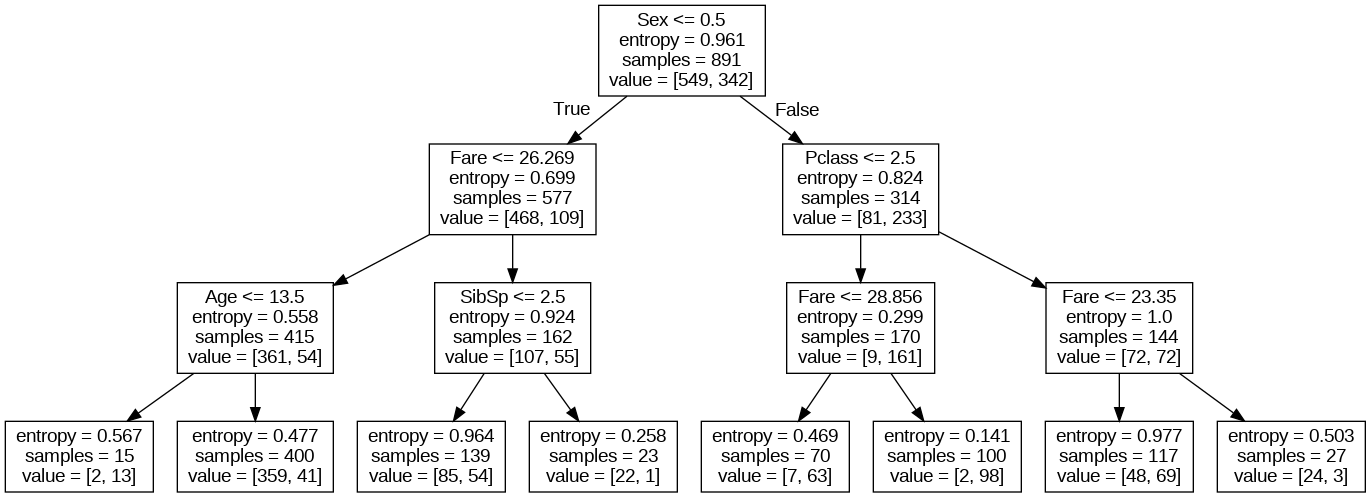

In [ ]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

**e) Interpret the tree**

From the tree, we can see several things. First, at the root of the tree is the Gender variable, indicating that it isthe single most important factor in making the classification. The branches to the left are for Gender = 0 or male.Each root and intermediate node contains the decision factor, the entropy, and the number of passengers who fitthe critierion at that point in the tree. For example, the root node indicates that there are 891 observations thatmake up the learning data set. At the next level, we can see that 577 people were male, and 314 were female. Inthe third level, at the far right, we can see that 415 people were male and paid a fare of less than 26.2686.Finally, the leaf nodes for that intermediate node indicate that 15 of these passengers were below the age of13.5, and the other 400 were older than that age.

Finally, the elements in the value array indicate survival. The first value is the number of people who died, andthe second is the number of survivors for each criterion. The root node tells us that out of our sample, 549people died and 342 survived.

Entropy is a measure of noise in the decision. Noise can be viewed as uncertainty. For example, in nodes inwhich the decision results in equal values in the survival value array, the entropy is at its highest possible value,which is 1.0. This means that the model was unable to definitively make the classification decision based on theinput variables. For values of very low entropy, the decision was much more clear cut, and the difference in thenumber of survivors and victims is much higher.


#**Part 2: Apply the Decision Tree Model**

In this part of the lab, we will use the results of the learned decision tree model to label an unlabelled dataset ofTitanic passengers. The decision tree will evaluate the features of each observation and label the observation assurvived (label = 1) or died (label = 0).

**Step 1: Import and Prepare the Data**

In this step, you will import and prepare the data for analysis.

***a) Import the data.***

Name the dataframe "testing" and import the file titanic-test.csv.

In [ ]:
#code cell 15
#import the file into the 'testing' dataframe.
testing = pd.read_csv("/content/titanic_test.csv")

In [ ]:
testing

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [ ]:
testing.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**How many records are in the data set?**

- There are 418 records in the data set

**Which important variables(s) are missing values and how many are missing?**
- The "Age" column is missing 86 values, "Fare" is missing 1 value, and "Cabin" is missing 327 values.

**b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 forfemale..**

In [ ]:
testing.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4

#code cell 4
testing["Sex"] = testing["Sex"].apply(lambda toLabel:0 if toLabel == 'male' else 1)

**c) Replace the missing age values with the mean of the ages.**

In [ ]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(),inplace = True)

**d) Verify that the values have been replaced.**

Check that the missing values have been filled and that the Gender labels are 0 and 1.

In [ ]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.
testing["Sex"].head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

**Step 2: Label the testing dataset**

In this step, you will apply the learned model to the testing dataset.

***a) Create the array of input variables from the testing data set.***

In [ ]:
testing.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
testing.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
testing["Fare"].fillna(testing["Fare"].mean(), inplace = True)

In [ ]:
testing.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

In [ ]:
testing.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**b) Apply the model to the testing data set.**

Use the predict() method of the clf_train object that was trained to label the observations in the testing dataset with the most likely survival classification. Provide the array of input variables from the testing data set as theparameter for this method.

In [ ]:
#code cell 20
#apply the model to the testing data and store the result in a pandas dataframe.
#Use X_input as the argurment for the predict() method of the clf_train classifier object

target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels,'Name':testing['Name']})

#display the first few rows of the data set

**c) Evaluate the accuracy of the estimated labels**

The ground truth for the survival of each passenger can be found in another file called `all_data.csv` . To selectonly the passengers contained in the testing dataset, we merge the `target_labels` dataframe and the a`ll_data` dataframe on the field `Name`. We then compare the estimated label with the ground truth dataframeand compute the accuracy of the learned model.

In [ ]:
#code cell 21
#import the numpy library as np
import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content/titanic_all.csv")

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels,all_data[['Name','Survived']],on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived'])/float(len(testing_results))

# Print the result

#**Part 3: Evaluate the Decision Tree Model**

The `sklearn` library includes a module that can be used to evaluate the accurracy of the decision tree model.The `train_test_split()` method will divide the observations in whole data set into two randomly selectedarrays of observations that makeup the testing and training datasets. After fitting the model to the training data,the trained model can be scored and the prediction accurracy compared for both the training and test datasets. Itis desirable for the two scores to be close, but the accuracy for the test dataset is normally lower that for thetraining data set.

##**Step 1: Import the data**
This time we will import the data from a `csv` file, but we will specify the columns that we want to have appear inthe dataframe. We will do this by passing an array-like list of column names to the `read_csv()` method `usecols`
parameter. Use the following columns: 'Survived', 'Fare', 'Pclass', 'Gender', 'Age', and 'SibSP'. Each should be inquotes and the list should be square brackets. Name this dataframe `all_data` .

In [ ]:
#code cell 22
#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("/content/titanic_all.csv",usecols = ['Survived','Pclass','Sex','Age','SibSp','Fare'])

#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


**How many records are in the data set?**

- There are 891 records in the data set.

**Which important variables(s) are missing values and how many are missing?**

- The "Age" variable is missing 177 values in total.

##**Step 2: Prepare the data.**

**a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.**

In [ ]:
#code cell 23
#Label the gender variable with 0 and 1
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel:0 if toLabel == 'male' else 1)

**c) Replace the missing age values with the mean of the age of all members of the data set.**

In [ ]:
#code cell 24
#replace missing Age values with the mean age
#display the first few rows of the data set
all_data["Age"].fillna(all_data["Age"].mean(), inplace = True)

all_data.head()

Survived  Pclass  Sex   Age  SibSp     Fare
0         0       3    0  22.0      1   7.2500
1         1       1    1  38.0      1  71.2833
2         1       3    1  26.0      0   7.9250
3         1       1    1  35.0      1  53.1000
4         0       3    0  35.0      0   8.0500

In [ ]:
all_data["Age"].isna().sum()

0

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


##**Step 2: Create the input and output variables for the training and testing data.**

The `sklearn` library includes modules that help with model selection. We will import from `sklearn.model_selection` the `train_test_split()`
method. This method will automatically split the entiredataset, returning in total four numpy arrays, two for the features (test and validation) and two for the labels (testand validation). One parameter of the method specifies the proportion of observations to use for testing andtraining. Another parameter specifies a seed value that will be used to randomize assignment of the observationto testing or training. This is used so that another user can replicate your work by receiving the sameassignments of observations to datasets. The syntax of the method is:

```train_test_split(input_X, target_y, test_size=0.4, random_state=0)```

40% of the data will be used for testing. The random seed is set to 0.

The method returns four values. These values are the input varibles for training and testing data and the targetvariables for the training and testing data in that order.

**a) Designate the input variables and output variables and generate the arrays.**

In [ ]:
#code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)

In [ ]:
all_data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Fare        float64
dtype: object

**b) Train the model and fit it to the testing data.**

Now the model can be fit again. The model will be trained using only the training datat, as selected by the
train_test_split
function.

In [ ]:
all_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [ ]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train,y_train)

**c) Compare models by scoring each.**

Use the score() method of each decision tree object to generate scores.

In [ ]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+train_score+' Testing score = '+test_score)

Training score = 0.8277153558052435 Testing score = 0.803921568627451


We have now compared the scores for the trained model on both test and validation data. As expected, the testaccuracy score is close, but lower than the score for the training data. This is because normally, the model tendsto overfit the training data, therefore the test score is a better evaluation of how the model is able to generalizeoutside of the training data.

#**Part 4 For Further Study (optional)**

If you have the time and are interested, you could try the following and see how the decision tree is affected.

**1. Remove observations with missing Age values.**

Using a mean to replace missing age values may affect the accuracy of the model. One approach to this mightbe to remove all observations with missing age values. Although this will decrease the size of the trainingdataset, it could improve accuracy.

**2. Remove the input variables.**

Another issue with this type of analysis is the identification of which input variables, or features, are essential tothe accuracy of the classifier. One way to do this is to try running the classifier with different sets of inputvariables by editing the list of variables that is used to fit the model.